In [21]:
library(naturalsort)
library(data.table)
library(data.tree)
library(Biostrings)
library(fields)
dataDir <- '../../Data/SimOut032118/'

In [22]:
flst<-list.files(dataDir) # Get list of files from directory
flst <- naturalsort(flst) # Natural sort the files
ncls <- c()
rs <- c()
k<-1
for (i in 1:(length(flst))) {
    load(paste0(dataDir,flst[i]))
    if (CellPop$totalCount==1) {
        ncls[[k]] <- CellPop$ncells[length(CellPop$ncells)]
    }
    else {
        ncls[[k]] <- sum(vapply(CellPop$Get('ncells'),tail,n=1L,FUN.VALUE = numeric(1)))
    }
    rs[[k]] <- CellPop$Get('r')
    rm('CellPop')
    k <- k+1
    
}

In [35]:
# Create the function.
getmode <- function(v) {
   uniqv <- unique(v)
   uniqv[which.max(tabulate(match(v, uniqv)))]
}

In [40]:
rs_var <- c()
rs_mean <- c()
ncells_var <- c()

for (i in 1:length(rs)) {
    
    if (length(rs[[i]])==1) {rs_var[i] <- 0}
    else {
        rs_var[i] <- var(rs[[i]])
        rs_mean[i] <- mean(rs[[i]])
    }
    ncells_var[i] <- var(ncls[[i]])

}

In [24]:
norml <- function(x) {
    x = (x-min(x))/(max(x)-min(x))
    return(x)}

In [25]:
ncls

[1] 16232 16141 15826 15317 15457 16356 16028 16213 16143 15503 16346 16175
[13] 15411 16417 17362 24309 16310 23278 14045 15649

In [26]:
matrix(ncls[1:20],nrow=4,ncol=5,byrow=TRUE)

16232,16141,15826,15317,15457
16356,16028,16213,16143,15503
16346,16175,15411,16417,17362
24309,16310,23278,14045,15649


In [41]:
matrix(rs_mean[1:20],nrow=4,ncol=5,byrow=TRUE)

0.9881649,0.9832135,0.9849344,0.9771787,0.9807845
0.9921933,0.9840880,0.9891923,0.9818919,0.9796405
0.9944837,0.9875816,0.9937745,1.0713844,1.4484481
1.9404974,0.9966734,1.8985716,0.9951609,1.0635256


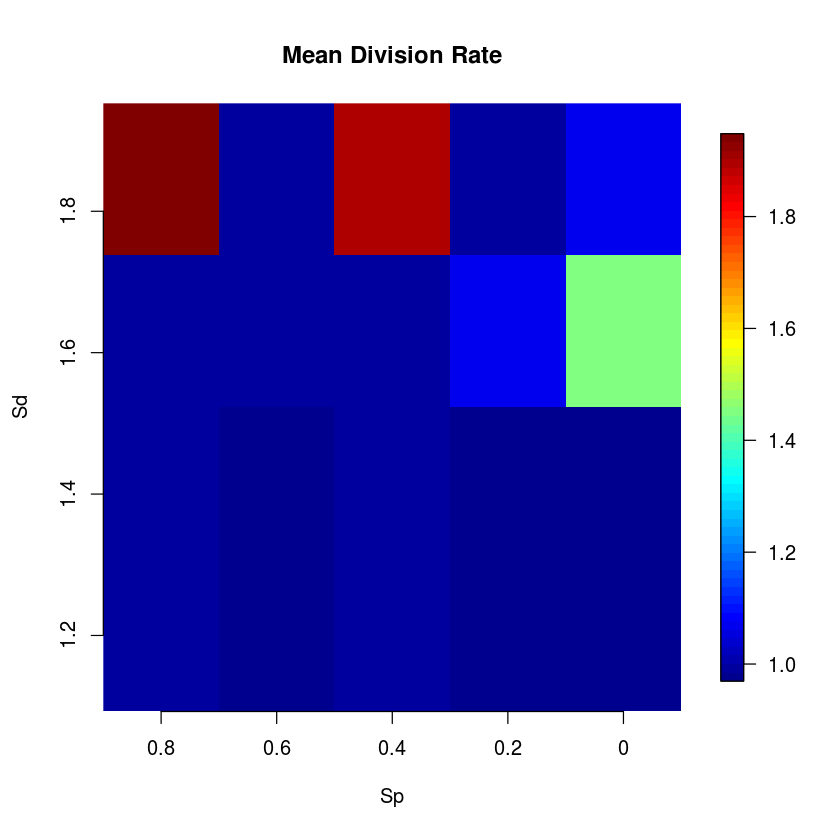

In [42]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(rs_mean[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Mean Division Rate",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,0.31), labels=seq(1.2,1.8,0.2)); 


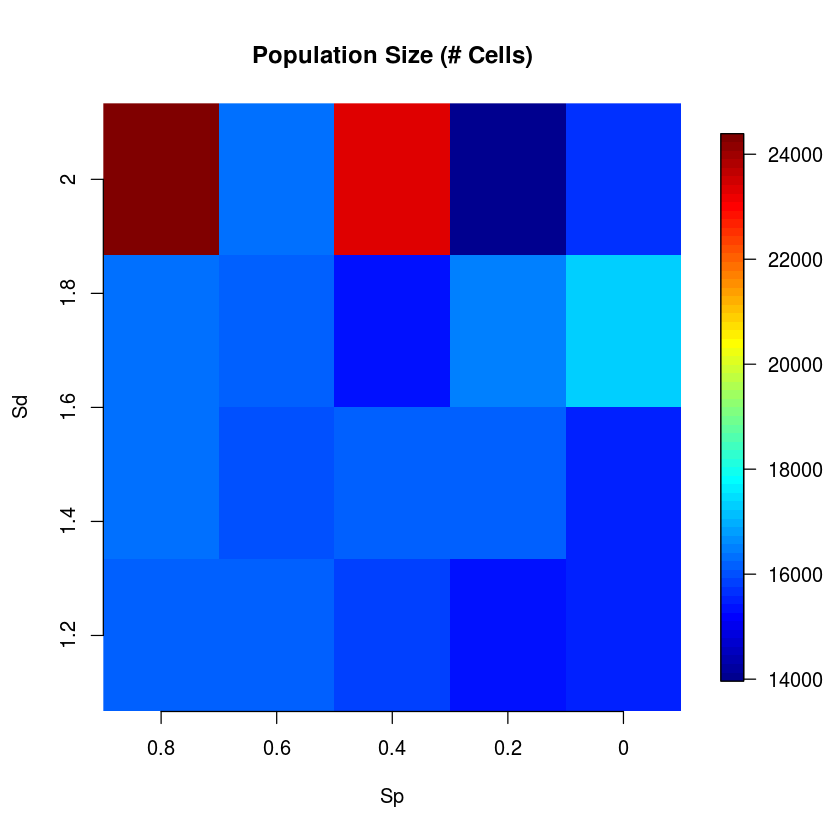

In [29]:
rotate <- function(x) t(apply(x, 2, rev))

image.plot(rotate(apply(matrix(ncls[1:20],nrow=4,ncol=5,byrow=TRUE),2,rev)),axes=F)

title(main="Population Size (# Cells)",xlab='Sp',ylab='Sd');
axis(1, at=seq(0,1,0.25), labels=seq(0.8,0.0,-0.2)); 
axis(2, at=seq(0,1,0.25), labels=seq(1.2,2.0,0.2)); 